# Problema II - Saúde Fetal

Análise exploratória de dados, com aplicação de de um modelo multiclasse que classifique os dados nestes três estados de saúde fetal.

Desenvolvido por José Trajano Mendes Neto, para a seleção em andamento do Laboratório LAIS, Edital 046

A mortalidade fetal é um problema de saúde pública em todo mundo, o que coloca em risco a vida da mulher e/ou do bebê. Este jupyter notebook demonstra a aplicação de várias técnicas de classificação de algoritmos de aprendizagem de máquina para prever o nível de risco da saúde fetal, classificando em três classes: Normal, Suspeito e Patológico a fim de prevenir a mortalidade infantil e materna. 

O dataset utilizado está disponível no Kaggle (https://www.kaggle.com/andrewmvd/fetal-health-classification) e é composto por 22 atributos(sendo 1 atributo multi-classe) e 2126 amostras (tuplas) de dados. 

#  1 - Arquitetura dos experimentos

Para solucionar o nosso problema, serão aplicadas etapas baseadas nos processos de descobertas de conhecimento em base de dados, com auxilio da linguagem de programação Python e suas bibliotecas, como pandas e sciki-learn. Seguindo as etapas, foram realizados processos como, importação da base de dados, análise da distribuição dos dados no dataset, identificação de valores nulos ou ausentes, análises de <i>outliers</i>, correlação dos dados, normalização do conjunto e aplicação nos modelos de classificação e posteriormente a verificação das métricas de avaliaçao dos modelos.

Métodos de Classificação em Machine Learning é o ato de identificar a qual classe um novo objeto analisado pertence baseado no treinamento de dados que determinam características das classes. Algoritmos de classificação são amplamente utilizados na definição o diagnósticos na área da sáude.

Para aplicação dos modelos de classificação, foram realizados testes com diferentes tipos de classificadores, utilizando os mesmo parâmetros de configuração de aleatorização da amostra e ajustando cada modelo  de acordo com o tipo escolhido. Os modelos escolhidos para os testes foram algoritmos de aprendizagem supervisionada: <b><i>Support Vector Machine (SVM), K-Nearest Neighbor (KNN), Logistic Regression (LR), Random Forest (RF) e Multilayer Perceptron</b></i>, esses modelos suportam classificação multicasse, que é o nosso objetivo. Os modelos serão avaliados de acordo com a acurácia, métricas de avaliação precision, recall e f1-score, como também pelos valores obtidos pela validação cruzada.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

In [2]:
#importar o dataset do kaggle https://www.kaggle.com/andrewmvd/fetal-health-classification
fetal_health = pd.read_csv("fetal_health.csv", delimiter=',')

In [3]:
#exibir o inicio do dataset
fetal_health.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# 2 - Pré-processamento dos dados

In [4]:
fetal_health.columns #Verificar os atriutos (colunas) do dataset

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [5]:
fetal_health.describe() #Análise estatísticas de dados

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [6]:
fetal_health.shape #Visualizar tamanho da amostra (2126 amostras com 22 atributos)

(2126, 22)

In [7]:
fetal_health.dtypes #Tipo de dados

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [8]:
#fetal_health.info(verbose=True), pode-se usar esse que retorna de forma reduzida a avaliação do dataset
fetal_health.isnull().sum() #Verificando se há valores ausentes nas colunas

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [9]:
fetal_health.isna().sum() #Verificando se há valores nulos nas colunas

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [10]:
fetal_health.duplicated().sum() #Verificar se existem valores duplicados
#fetal_health[fetal_health.duplicated() == True]

13

Remover elementos duplicados do dataset, pois não agregam informação ao modelo futuro

In [11]:
fetal_health = fetal_health.drop_duplicates()

Novo tamanho do dataset, após a exclusão das tuplas duplicadas:

In [12]:
fetal_health.shape

(2113, 22)

Após a verificação dos dados, em questão da identificação dos atributos nulos ou ausentes, não foram identificados tais valores. Caso existissem, poderia ser utilizado a função <b>fetal_health.fillna(fetal_health.mean(0))</b> para preencher com a média dos valores, essa estratégia é comumente utilizada para solucionar o problema de atributos faltantes e ou nulos.

# 2.1 Identificando a porcentagem de outliers no conjunto de dados

In [13]:
import statistics

df = fetal_health

print("Porcentagem de valores outliers conforme desvio padrão:\n")


for col in df.columns: 

    # inicia uma lista vazia onde colocaremos os outliers
    outliers = []

    # desvio padrão 
    desv_pad = statistics.stdev(df[col])

    # média dos seus dados
    media = statistics.mean(df[col])

    # coloca o limite que determina se é outlier
    limite = desv_pad * 3

    limite_inferior = media - limite
    limite_superior = media + limite

    # Localiza outliers e anexa à nossa lista que iniciamos sem nada
    for outlier in df[col]:
        if outlier > limite_superior or outlier < limite_inferior:
            outliers.append(outlier)

    # percentual da coluna que é outlier
   
    print(round((len(outliers)/len(df[col])*100), 2), "%    -", col)

Porcentagem de valores outliers conforme desvio padrão:

0.0 %    - baseline value
1.09 %    - accelerations
1.47 %    - fetal_movement
0.14 %    - uterine_contractions
2.04 %    - light_decelerations
0.33 %    - severe_decelerations
5.11 %    - prolongued_decelerations
0.0 %    - abnormal_short_term_variability
1.56 %    - mean_value_of_short_term_variability
2.79 %    - percentage_of_time_with_abnormal_long_term_variability
1.56 %    - mean_value_of_long_term_variability
0.0 %    - histogram_width
0.0 %    - histogram_min
0.66 %    - histogram_max
0.9 %    - histogram_number_of_peaks
1.33 %    - histogram_number_of_zeroes
1.85 %    - histogram_mode
1.23 %    - histogram_mean
0.76 %    - histogram_median
2.04 %    - histogram_variance
0.0 %    - histogram_tendency
0.0 %    - fetal_health


Um critério de identificação de outliers amplamente utilizado no meio cientifico é através do desvio padrão, verificando a dispersão que visa identificar o quanto os dados são uniformes. Uma regra comumente aplicada é: se o ponto estiver a mais de 3 desvios padrões da média, é considerado um outlier, com isso, o método acima calcula o desvio padrão para todos os elementos de cada atributo, atribui os limites inferior e superior e compara cada elemento  com os limites.

Após a aplicação dos cáculos do desvio padrão e limites, e após comparar e contar a quantidade de valores que fojem do padrão, calcula-se a porcetagem de ocorrência desses valores. Conclui-se que de acordo com o desvio padrão, os atributos apresentam baixa ocorrência de outliers, com a presençã máxima de 5,11% no atributo prolongued_decelerations, e inferiores a 3% nos demais.

Tendo isso em vista, opta-se inicialmente por não modificar esses dados no momento, pois apresentam ocorrência baixa. Mas, faz-se necessário futuramente analisar os valores individualmente, para averiguar caso a caso.

# 3 - Análise inicial dos Dados

In [14]:
#Análise da classe alvo > fetal_health

In [15]:
fetal_health["fetal_health"].describe() #Descrição estatística dos dados

count    2113.000000
mean        1.303833
std         0.614279
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: fetal_health, dtype: float64

In [16]:
fetal_health['fetal_health'].value_counts() 
#Descrição resumida da classe alvo, identifica-se que é o dataset possui mais ocorrências para a classe 1

1.0    1646
2.0     292
3.0     175
Name: fetal_health, dtype: int64

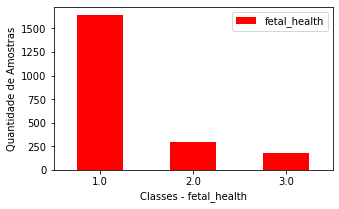

In [17]:
#Visualização da distribuição das classes
fetal_health['fetal_health'].value_counts().plot(kind="bar", figsize=(5,3), grid = False, rot=0, color="red")
plt.xlabel("Classes - fetal_health")
plt.ylabel("Quantidade de Amostras")
plt.legend()
plt.show()

In [18]:
fetal_health['fetal_health'].value_counts() 

1.0    1646
2.0     292
3.0     175
Name: fetal_health, dtype: int64

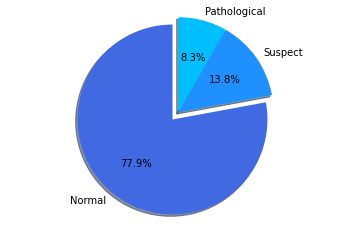

In [19]:
#Gráfico de proporção entre as classes
labels = ["Normal", "Suspect", "Pathological"]

normal = (fetal_health['fetal_health'] == 1.0).sum()
suspect = (fetal_health['fetal_health'] == 2.0).sum()
pathological = (fetal_health['fetal_health'] == 3.0).sum()

cores = ['#4169E1', '#1E90FF', '#00BFFF']
explode = (0.1, 0, 0)  # somente explode primeiro pedaço

plt.pie([normal, suspect, pathological], explode=explode, labels=labels, colors=cores, autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal') 
plt.show()

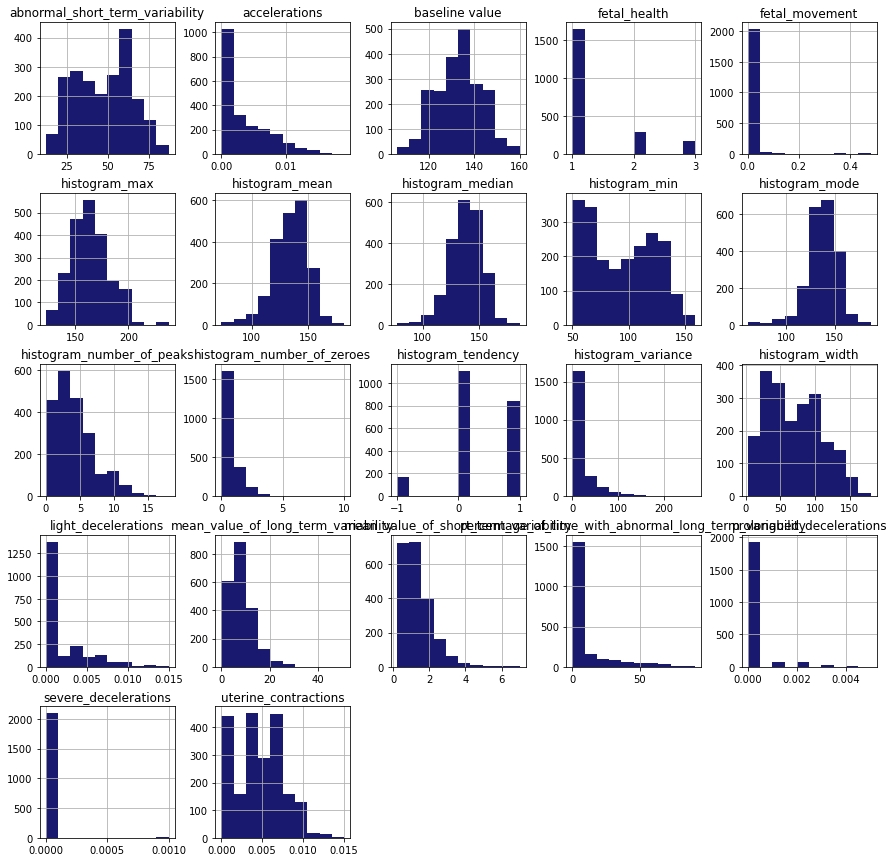

In [20]:
#Verificar a distribuição dos dados
datafh_hist_plot = fetal_health.hist(figsize = (15,15), color = "#191970")

Pode-se perceber a partir do histograma, como os dados variam, no que diz respeito a faixa de min e max, então, verificado isso, faz-se necessário antes de aplicar ao modelo de predição, realizar a normalização dos dados para definir os dados em uma mesma faixa.

In [21]:
#Verificar a correlação entre as variáveis e a variável alvo (fetal_health)
numeric_corr = fetal_health.corr()

n_feature = numeric_corr["fetal_health"].sort_values(ascending=False).head(10).to_frame()

cm = sns.light_palette("#191970", as_cmap=True)

table = n_feature.style.background_gradient(cmap=cm)

O coeficiente de correlação mede a relação linear entre dois pares de atributos nos dados. 
A correlação requer que cada conjunto de dados seja normalmente distribuído.
Mas vale lembrar que, a correlação não indica causalidade entre as variáveis.
Logo, verificou-se quais variáveis possuem <b>maior correlação</b> com a <b>variável alvo fetal_health</b>

In [22]:
table

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.486752
abnormal_short_term_variability,0.469671
percentage_of_time_with_abnormal_long_term_variability,0.421634
histogram_variance,0.208171
baseline value,0.146077
severe_decelerations,0.132408
fetal_movement,0.088057
histogram_min,0.063529
light_decelerations,0.059651


Verifica-se, após a aplicação da função <b>.corr()</b> (com parâmetros padrões da biblioteca) no dataset, que existem três caracteristicas que possuem uma maior relação com o atributo alvo em relação as demais: prolongued_decelerations, abnormal_short_term_variability	e percentage_of_time_with_abnormal_long_term_variability. 	

# 4 - Normalização dos dados e divisão do dataset

Dado o histograma apresentado anteriormente, faz-se necessário a normalização dos dados que serão inseridos no modelo. 
Vale lembrar que os valores a serem normalizados são os valores que tem poder sobre a variável alvo, no caso todos os atributos, com exceção de "fetal_health".

A normalização de um dataset é um requisito comum para muitos modelos de aprendizado de máquina. Os modelos podem se comportar mal se os atributos individuais não apresentarem a mesma distribuição padrão (escala). Dependendo do modelo de aprendizado utilizado, é extremamente importante padronizar os dados.

In [23]:
sc = StandardScaler() #definir o método de normalização dos dados

Optou-se em utilizar a função StandardScaler da biblioteca do sklearn, que é um método de padronizar os atributos removendo a média e escalonando para a variação da unidade. A normalização de uma amostra x é calculada: z = ((x - u) / s) onde <b>u</b> é a média das amostras de treinamento, e <b>s</b> é o desvio padrão das amostras de treinamento.

In [24]:
x_col = fetal_health.drop('fetal_health', axis = 1).columns

In [25]:
x = sc.fit_transform(fetal_health.drop(["fetal_health"],axis = 1)) #Divisão do dataset, com as variaveis sem o atributo alvo e normalizando
y = fetal_health.fetal_health #Atribuição do atributo alvo ao Y

In [26]:
x_norm = pd.DataFrame(x, columns = x_col)

Dividindo o dataset em treino e teste em > 80/20, 80% para treino e 20% para teste. Dividir aleatoriamente em duas partes, para que elas representem bem o dataset é o método ideal para aplicação em modelos de aprendizado de máquina. 

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.3, random_state=42)

Utilizou-se o parâmetro random_state = 42, por ser um gerador aleatório de números, e é popularmente definido como 0 ou 42.

# 4.1 - Undersampling e Oversampling

Devido ao desbalanceamento das classes identificado anteriormente, foi avaliado a possibilidade de utilizar os métodos de <b>undersampling</b> e <b>oversampling</b>, esta técnicas modificam o conjunto de dados, excluindo-se ou adicionando exemplos da classes para deixar todas as classes com a mesma quantidade de ocorrências. No entanto, essa redução causa perda de informações importantes para um modelo quando utilizado "undersampling" e podem ocasionar overfitting quando utilizado o oversampling, deixando o modelo de apredizado sobreajustado.

Diante ao número de classes, inicialmente optou-se em não utilizar essas técnicas no modelo, a fim de verificar como os modelos se comportam, e futuramente analisar a necessidade do uso, mas de antemão não é uma técnica que posso definir como essencial para esse problema.

# 5 - Definição e avaliação dos modelos classificadores

Como definido na introdução deste notebook, foram definidos 5 algorimos de classificação, nesta etapa esses algoritmos serão testados e avaliados conforme suas métricas. Esses algoritmos são um métodos populares de aprendizado de máquina para classificação e outras tarefas de aprendizado. 

Algoritmos de classificação são utilizados quando amostras pertencem a duas ou mais classes e queremos identificar com os dados já rotulados como prever a classe de dados não rotulados. Diante disso, os algoritmos foram selecionados pore serem uns dos mais populares para essa finalidade, e serão aplicados ao nosso problema a fim de comparar qual modelo se comporta melhor ao nosso problema.

Métricas de avaliação dos modelos:

<li>TP - True Positive</li>
<li>FP - False Positive</li>
<li>FN - False Negative</li>

Para avaliar os modelos mais profundamente será utilizado o Relatório de Classificação da biblioteca do sklearn.

Relatório inclui precision, recall e F1-score:

A <b>Precisão</b> - é intuitivamente a capacidade do classificador de não rotular como positiva uma amostra negativa.<li><b>precision = TP / TP + FP</b></li>

<b>Recall (sensibilidade)</b> - é a capacidade do classificador de encontrar todas as amostras positivas. 
<li><b>recall = TP / TP + FN </b></li>

<b>F1-score</b> - é a média ponderada da precisão e do <i>recall</i>. Portanto, essa pontuação leva em consideração os falsos positivos e os falsos negativos. F1 é geralmente é mais útil do que a precisão, quando se tem uma distribuição de classes desigual, que é nosso caso. A precisão funciona melhor se falsos positivos e falsos negativos tiverem custos semelhantes. Caso o custo de falsos positivos e falsos negativos são bastantes diferentes, é melhor verificar para Precisão ou <i>Recall</i>.

<li><b>f1-score = 2*(precision) / (recall + precision)</li></b>

Nas próximas etapas, os algoritmos serão aplicados e avaliados conforme score e demais métricas. Para o treinamento dos algoritmos será utilizada a função <b>.fit()</b> de cada modelo passando como parâmetro os conjuntos de treinamento <b>x_train</b> e <b>y_train</b>. Alguns modelos foram aplicados utilizando os parâmetros padrão da biblioteca do sklearn.

Para melhorar o modelo será aplicado o <b>StratifiedKFold</b>, este método embaralha os dados, depois divide os dados de acordo com o n_splits. Após isso, o método ultiliza cada parte como um conjunto de teste. Vale lembrar esse processo apenas embaralha os dados uma vez antes de dividir. Esse método utilizando o StratifiedKFold melhora o treinamento do modelo, define melhor a aleatorização da seleção das amostras.

Para avaliar o desempenho dos algoritmos uma <b>Matriz de confusão</b> foi gerada para cada, ela serve de suporte para avaliar a qualidade do classificador, pois nela é possível identificar os verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativo. Em outras palavras, quão bom o modelo é em prever positivos, sendo positivo entendido como a classe que se queremos prever.

<b>Cross Validation </b> - A validação cruzada fornece uma maneira de melhorar o desempenho estimado de um modelo de aprendizado de máquina. Esse método visa repetir o procedimento de validação cruzada várias vezes e relatar o resultado médio em todas os testes em todas as execuções. Com isso, espera-se que o resultado médio seja uma estimativa mais precisa do verdadeiro desempenho médio do modelo no conjunto de dados.

Foi definido como métodos de parada (numero de iteração) dos algoritmos como ilimitado para todos os modelos, exceto o MLP que foi definido para 3000 devido ao poder computacional necessário, conforme a documentação de cada modelo utilizado, essa definição é utilizada para deixar o algoritmo realizar a convergência do resultado de cada modelo.

# 5.1 - Rodada de teste 1 - SVM

In [28]:
from sklearn import svm #importação do modelo

In [29]:
clf_svm = svm.SVC() #definição do modelo

In [109]:
clf_svm.fit(x_train, y_train)

SVC()

In [31]:
clf_svm.score(x_test,y_test)

0.9305993690851735

In [32]:
y_pred_svm = clf_svm.predict(x_test)

In [33]:
#Acurácia do modelo
print(classification_report(y_test,y_pred_svm))
print(confusion_matrix(y_test,y_pred_svm))

              precision    recall  f1-score   support

         1.0       0.94      0.99      0.96       497
         2.0       0.86      0.66      0.74        90
         3.0       1.00      0.83      0.91        47

    accuracy                           0.93       634
   macro avg       0.93      0.83      0.87       634
weighted avg       0.93      0.93      0.93       634

[[492   5   0]
 [ 31  59   0]
 [  3   5  39]]


Conforme as métricas de avaliação, o modelo se comporta melhor para as classes 1 e 3

In [34]:
cv_method = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

In [35]:
#Validação cruzada
scores_svm = cross_val_score(clf_svm,x,y, cv = cv_method)
print('media = ', scores_svm.mean())
print('desvio padrão = ', scores_svm.std())

media =  0.9110231302385557
desvio padrão =  0.005775001547367149


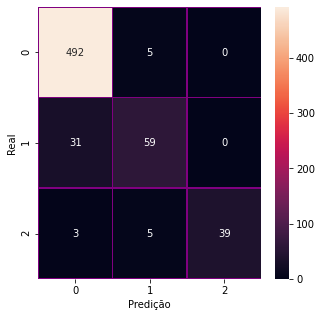

In [36]:
#Matriz de Confusão - visual

yprediciton_svm = clf_svm.predict(x_test)
ytrue_svm = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue_svm,yprediciton_svm)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="purple",fmt=".0f",ax=ax)
plt.xlabel("Predição")
plt.ylabel("Real")
plt.show()

Verifica-se que a partir da matriz de confusão aplicada ao algoritmo SVM, pode-se perceber que o modelo classifica melhor as classes 1 e 2, a taxa de acerto da classe 2 é baixa em relação as demais classes.

# 5.2 - Rodada de teste 2 - KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
neigh = KNeighborsClassifier(n_neighbors=3) #por ser um conjunto mais simples, optou-se por definir o numero de vizinhos = 3

In [108]:
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
neigh.score(x_test, y_test)

0.9148264984227129

In [41]:
y_pred_neigh = neigh.predict(x_test)

In [42]:
#Accuracy of the predicted values
print(classification_report(y_test,y_pred_neigh))
print(confusion_matrix(y_test,y_pred_neigh))

              precision    recall  f1-score   support

         1.0       0.94      0.98      0.96       497
         2.0       0.79      0.62      0.70        90
         3.0       0.83      0.83      0.83        47

    accuracy                           0.91       634
   macro avg       0.85      0.81      0.83       634
weighted avg       0.91      0.91      0.91       634

[[485  11   1]
 [ 27  56   7]
 [  4   4  39]]


In [43]:
cv_method = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

In [44]:
scores_neigh = cross_val_score(neigh,x,y, cv = cv_method)
print('media = ', scores_neigh.mean())
print('desvio padrão = ', scores_neigh.std())

media =  0.8973008005587793
desvio padrão =  0.006819000309931688


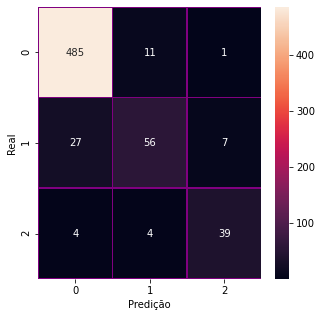

In [45]:
#Matriz de Confusão - visual

yprediciton_neigh = neigh.predict(x_test)
ytrue_neigh = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue_neigh,yprediciton_neigh)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="purple",fmt=".0f",ax=ax)
plt.xlabel("Predição")
plt.ylabel("Real")
plt.show()

# 5.3 - Rodada de teste 3 - Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr = LogisticRegression(random_state=0)

In [107]:
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [49]:
lr.score(x_test, y_test)

0.9148264984227129

In [50]:
y_pred_lr = lr.predict(x_test)

In [51]:
#Accuracy of the predicted values
print(classification_report(y_test,y_pred_lr))
print(confusion_matrix(y_test,y_pred_lr))

              precision    recall  f1-score   support

         1.0       0.94      0.97      0.96       497
         2.0       0.77      0.64      0.70        90
         3.0       0.83      0.81      0.82        47

    accuracy                           0.91       634
   macro avg       0.85      0.81      0.83       634
weighted avg       0.91      0.91      0.91       634

[[484  11   2]
 [ 26  58   6]
 [  3   6  38]]


In [52]:
cv_method = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

In [53]:
scores_lr = cross_val_score(lr,x,y, cv = cv_method)
print('media = ', scores_lr.mean())
print('desvio padrão = ', scores_lr.std())

media =  0.8939890930582419
desvio padrão =  0.003557188443358507


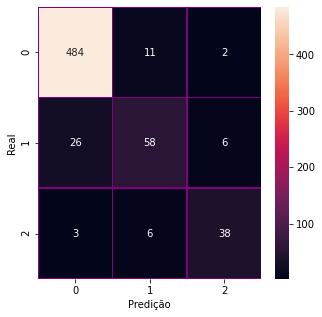

In [54]:
#Matriz de Confusão - visual

yprediciton_lr = lr.predict(x_test)
ytrue_lr = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue_lr,yprediciton_lr)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="purple",fmt=".0f",ax=ax)
plt.xlabel("Predição")
plt.ylabel("Real")
plt.show()

# 5.4 - Rodada de teste 4 - Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf = RandomForestClassifier(max_depth=5, random_state=0) #Definição do modelo, com parâmetro da profundidade da arvore = 5

In [106]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [58]:
rf.score(x_test, y_test)

0.9274447949526814

In [59]:
y_pred_rf = rf.predict(x_test)

In [60]:
#Accuracy of the predicted values
print(classification_report(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

              precision    recall  f1-score   support

         1.0       0.93      0.98      0.96       497
         2.0       0.84      0.64      0.73        90
         3.0       0.98      0.87      0.92        47

    accuracy                           0.93       634
   macro avg       0.92      0.83      0.87       634
weighted avg       0.92      0.93      0.92       634

[[489   7   1]
 [ 32  58   0]
 [  2   4  41]]


In [61]:
cv_method = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

In [62]:
scores_rf = cross_val_score(rf,x,y, cv = cv_method)
print('media = ', scores_rf.mean())
print('desvio padrão = ', scores_rf.std())

media =  0.9171770900494306
desvio padrão =  0.004116118361498483


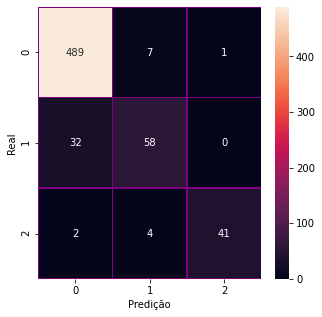

In [63]:
#Matriz de Confusão - visual

yprediciton_rf = rf.predict(x_test)
ytrue_rf = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue_rf,yprediciton_rf)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="purple",fmt=".0f",ax=ax)
plt.xlabel("Predição")
plt.ylabel("Real")
plt.show()

# 5.5 - Rodada de teste 5 - MLP

In [97]:
from sklearn.neural_network import MLPClassifier

In [98]:
clf_mlp = MLPClassifier(random_state=1, max_iter=3000, hidden_layer_sizes=(21,21,21))

Foi definido o tamanho dos neurônios como 21 em três camadas iguais, que tem o mesmo número de neurônios que a contagem de recursos no conjunto de dados (21). Conforme o: x_train.shape e x_test.shape

In [99]:
clf_mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(21, 21, 21), max_iter=3000, random_state=1)

In [100]:
clf_mlp.score(x_test, y_test)

0.9369085173501577

In [101]:
y_pred_mlp = clf_mlp.predict(x_test)

In [102]:
#Accuracy of the predicted values
print(classification_report(y_test,y_pred_mlp))
print(confusion_matrix(y_test,y_pred_mlp))

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       497
         2.0       0.87      0.69      0.77        90
         3.0       0.83      0.94      0.88        47

    accuracy                           0.94       634
   macro avg       0.89      0.87      0.87       634
weighted avg       0.94      0.94      0.93       634

[[488   6   3]
 [ 22  62   6]
 [  0   3  44]]


In [103]:
cv_method = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

In [104]:
scores_mlp = cross_val_score(clf_mlp,x,y, cv = cv_method)
print('media = ', scores_mlp.mean())
print('desvio padrão = ', scores_mlp.std())

media =  0.9195478723404255
desvio padrão =  0.004789278962654822


# 5.6 - Resumo dos Classificadores

In [110]:
results = pd.DataFrame({
                        "Modelo": ["Logistic Regression", "KNN", "SVM", "Random Forest", "MLP"],
                        "Score": [lr.score(x_test, y_test), neigh.score(x_test, y_test), clf_svm.score(x_test,y_test), rf.score(x_test, y_test),clf_mlp.score(x_test, y_test)]
                        })
result_df = results.sort_values(by="Score", ascending=False)
result_df = result_df.set_index("Score")
result_df.head(5)

,Modelo
Score,
0.936909,MLP
0.930599,SVM
0.927445,Random Forest
0.914826,Logistic Regression
0.914826,KNN


Diante o exposto em cada algoritmo, pode-se perceber que todos os algoritmos utilizados, conseguiram classificar as amostras com <b>pontuações</b> superiores a <b>91%</b>. Vale ressaltar que os modelos foram mais eficientes em classificar as classes 1 e 3. A classe 1 apresenta uma pontuação melhor, isso pode ser justificado devido a classe 1 ser a classe marjoritária. Apesar da classe 2 possuir mais amostras, a pontuação da classe 2 é menor que a classe 3.

A classe 2, apresentou desempenho abaixo das demais, pode-se verificar na pontuação de recall, foi bastante inferior as demais.  Isto é, porcentagem de exemplos positivos classificados como positivos, os falsos negativos (positivo real classificado errado) também são considerados.

Com isso, conforme os valores dos classificadores individuais, poderemos fazer alguns testes ultilizando comitês.

# 6 - Testes Comitês de classificadores

Os métodos de conjuntos são definidos pelo treinamento de vários modelos combinados para resolver o mesmo problema. A aprendizagem de conjunto também é chamada de aprendizagem baseada em comitês. A capacidade de generalização de um comitê é muitas vezes melhor do que a de modelos individuais.

Os comitês são classificados em dois tipos: Homogêneos e Heterogêneos. Os comitês homogêneos possuem como base um único tipo de algoritmo, tal como o Bagging. Enquanto os comitês heterogêneos são formados por diferentes tipos de algoritmos, que são distribuídos como classificadores base e classificador meta. Nessa categoria se destaca o Stacking.


# 6.1 Classificador Homogêneo

In [73]:
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection

In [74]:
bagging = BaggingClassifier (KNeighborsClassifier(), max_samples = 0.5, max_features = 0.5)

In [75]:
kfold = model_selection.KFold(n_splits = 3, random_state=1, shuffle=True)

In [76]:
classif = MLPClassifier(random_state=1, max_iter=3000, hidden_layer_sizes=(100,100,100))

In [77]:
model = BaggingClassifier(base_estimator=classif, n_estimators = 3, random_state=0)

In [78]:
%%time
result_mlp_bagging = model_selection.cross_val_score(model, x, y, cv=kfold)

Wall time: 49.4 s


In [79]:
print(result_mlp_bagging.mean())

0.9290142112615517


In [80]:
print(result_mlp_bagging.std())

0.005003544205894213


# 6.2 Classificador Heterogêneo

In [81]:
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier


In [111]:
mlp = MLPClassifier(random_state=1, max_iter=3000, hidden_layer_sizes=(21,21,21))
knn = KNeighborsClassifier(n_neighbors=3)
svm = SVC(kernel='linear', C=1)
lr = LogisticRegression(random_state=0)

In [112]:
estimators1 = [('knn', KNeighborsClassifier(n_neighbors=3)), ('svm', (SVC(kernel='linear', C=1))), ('lr', LogisticRegression(random_state=0))]

In [113]:
estimators2 = [('mlp', MLPClassifier(random_state=1, max_iter=3000, hidden_layer_sizes=(21,21,21))), ('svm', (SVC(kernel='linear', C=1))), ('lr', LogisticRegression(random_state=0))]

In [114]:
estimators3 = [('knn', KNeighborsClassifier(n_neighbors=3)), ('mlp', MLPClassifier(random_state=1, max_iter=3000, hidden_layer_sizes=(21,21,21))), ('lr', LogisticRegression(random_state=0))]

In [115]:
estimators4 = [('knn', KNeighborsClassifier(n_neighbors=3)), ('mlp', MLPClassifier(random_state=1, max_iter=3000, hidden_layer_sizes=(21,21,21))), ('svm', (SVC(kernel='linear', C=1)))]

In [116]:
clf1 = StackingClassifier(estimators=estimators1, final_estimator=mlp)

In [117]:
clf2 = StackingClassifier(estimators=estimators2, final_estimator=knn)

In [118]:
clf3 = StackingClassifier(estimators=estimators3, final_estimator=svm)

In [119]:
clf4 = StackingClassifier(estimators=estimators4, final_estimator=lr)

In [120]:
%%time
clf1.fit(x_train, y_train).score(x_test, y_test)

Wall time: 5.39 s


0.9227129337539433

In [121]:
%%time
clf2.fit(x_train, y_train).score(x_test, y_test)

Wall time: 35.8 s


0.9321766561514195

In [122]:
%%time
clf3.fit(x_train, y_train).score(x_test, y_test)

Wall time: 36.5 s


0.9400630914826499

In [123]:
%%time
clf4.fit(x_train, y_train).score(x_test, y_test)

Wall time: 35.9 s


0.944794952681388

# Conclusões

Diante aos valores identificados após a aplicação dos algoritmos de classificação. Pôde-se perceber que os algoritmos quando aplicados de forma indiviual, de certa forma apresentaram pontuações bem elevadas. Com destaque o MLP com a maior pontuação dentre os algoritmos aplicados.

O uso de comitês heterogêneos apresentou resultados satisfatórios também. Com valores superiores aos individuais. Destaca-se o comitê heterogêneo 3 e 4 com pountuações superiores a 94,47%

Com isso, pode-se definir como o melhor método de classificação o uso de MLP para o modelo individual e o comitê 4 que utilizou como classificadores bases: KNN+MLP+SVM e meta classificador LR.

Como limitadores, fica destacado o desbalanceamento das classes, apesar da classe afetada ser o a 2, que é classificado como suspeito, as demais classes que tem um diangóstico mais preciso (normal e pathological) se comportaram de maneira eficiente diante aos algoritmos utilizados.

Conforme evidênciado, o uso de aprendizado de máquina para o problema definido é essencialmente eficaz, e deve ser explorado, aumentando o número de amostras e ajustando os parâmetros de cada algoritmo conforme necessário.

Finaliza-se aqui, o desenvolvimento do projeto para a seleção do LAIS/046-2020